In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data

In [3]:
df=pd.read_csv("full.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [10]:
df[(df['Age']>50) | (df['Sex']=='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,S,902.0,"Johnson, Mrs. Elisabeth Vilhelmina (née Berg)",26.0,"St. Charles, Illinois, US",Southampton,"St. Charles, Illinois, US",15,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,...,S,1119.0,"Peacock, Miss Treasteall",4.0,"Southampton, Hampshire, England",Southampton,"Elizabeth, New Jersey, US",NaN,NaN,3.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,...,Q,1064.0,"Naughton, Miss Hannah",21.0,"Donoughmore, Ireland",Queenstown,New York City,NaN,NaN,3.0
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,...,Q,206.0,"Minahan, Mrs. Lillian E. (née Thorpe)",37.0,"Fond du Lac, Wisconsin, US",Southampton,"Fond du Lac, Wisconsin, US",14,NaN,1.0
1303,1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,...,S,869.0,"Henriksson, Miss Jenny Lovisa",28.0,"Stockholm, Sweden",Southampton,"Iron Mountain, Michigan, US",NaN,3MB,3.0


# Getting a summary of the data types

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## Shape of Data

In [328]:
df.shape

(1309, 21)

## Descriptive Statistics of all columns

In [329]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
count,1309.000000,891.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,...,1307,1304.000000,1304,1302.000000,1304,1304,1304,502,130,1304.000000
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,...,3,NaN,1303,NaN,566,4,291,24,130,NaN
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,...,S,NaN,"Kelly, Mr. James",NaN,"New York, New York, US",Southampton,New York City,13,121MB,NaN
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,...,914,NaN,2,NaN,70,916,234,42,1,NaN
mean,655.000000,0.383838,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,...,NaN,658.534509,NaN,29.415829,NaN,NaN,NaN,NaN,NaN,2.291411
std,378.020061,0.486592,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,...,NaN,380.377373,NaN,13.758954,NaN,NaN,NaN,NaN,NaN,0.840852
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,...,NaN,1.000000,NaN,0.170000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,...,NaN,326.750000,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,1.750000
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,...,NaN,661.500000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,3.000000
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,...,NaN,987.250000,NaN,37.750000,NaN,NaN,NaN,NaN,NaN,3.000000


## Checking for Duplicated rows

In [330]:
df.duplicated().sum()

0

No duplicated rows

## Checking for missing values

In [331]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

There are 418 missing values in Survived variable, 263 missing values in Age variable, 1014 missing values in Cabin variable, 807 missing values in Lifeboat variable, 1179 missing values in Body variable, 5 missing values in class variable

### Checking 'Body variable'

In [332]:
print(df['Body'].unique())

print(df['Body'].value_counts())


print("percentage of missing : ", (1179/1309)*100)

[nan '175MB' '322M' '38MB' '234MB' '181MB' '309M' '140MB' '240{?}MB'
 '283MB' '169MB' '285MB' '98MB' '207MB' '328MM' '171MB' '43MB' '51MB'
 '7MB' '101MB' '15MB' '174MB' '201MB' '255MB' '245MB' '75MB' '18MB'
 '143MB' '305MB' '108MB' '230MB' '110MB' '188MB' '306MB' '166MB' '147MB'
 '236MB' '295MB' '72MB' '314' '232MB' '4MB[84]' '156MB' '103MB' '165MB'
 '249MB' '275MB' '271MB' '332O' '258MB' '22MB' '312M' '173MB' '68MB'
 '62MB' '263MB' '287MB' '206MB' '47MB' '17MB' '197MB' '55MB' '69MB' '46MB'
 '122MB' '256MB' '97MB' '284MB' '89MB' '130MB' '19MB' '37MB' '149MB'
 '14MB' '172MB' '269MB' '176MB' '61MB' '52MB' '126MB' '79MB' '[66][67]'
 '50MB' '8MB' '259MB' '196MB' '155MB' '12MB' '70MB' '131MB' '80MB' '119MB'
 '9MB' '121MB' '58MB' '209MB' '189MB' '45MB' '96MB' '148MB' '293MB'
 '294MB' '299MB' '331O' '304MB' '194MB' '261MB' '208MB' '142MB'
 '1{?}MB[86][87]' '124MB' '260MB' '327MM' '187MB' '298MB' '292MB' '286MB'
 '135MB' '307M' '109MB' '16MB' '133MB' '297MB' '81MB' '153MB' '67MB'
 '28MB[82]' '

A majority of the data is missing in this column (90% of the data). therefore this column should be removed

## Drop 'Body variable'

In [333]:
df.drop(columns=['Body'], axis=1, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Class 

The body variable is removed 

## Distribution of Age and Age_wiki

<AxesSubplot:xlabel='Age', ylabel='Count'>

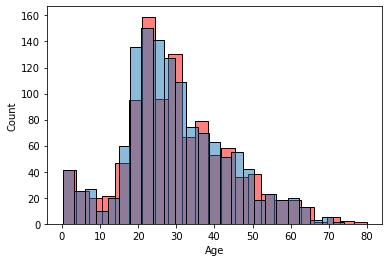

In [334]:
sns.histplot(data=df,x='Age',alpha=0.5,color='r')
sns.histplot(data=df,x='Age_wiki', alpha=0.5 )

Both have the same right skewed distribution. Age has 263 missing values while Age_wiki has only 7 missing values. since the distribution is skewed it is better to use median as the imputed value 

### Replacing missing values of  'Age ' (in original dataset)  with 'Age_wiki'

The missing values in original Age variable will be replaced with the values of Age_wiki variable first

In [335]:
df['Age'].fillna(df['Age_wiki'], inplace=True)

Now check for the total missing values of Age variable and its distribution

In [336]:
df['Age'].isnull().sum()

4

There are only 4 missing values. these can be imputed with the median 

## imputing missing values of Age

In [337]:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Class
42,43,0.0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,946.0,"Kraeff, Mr. Theodor",NaN,"Vetren, Bulgaria",Cherbourg,"Madison, Wisconsin, US",NaN,3.0
347,348,1.0,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,421,0.0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C,823.0,"Gheorgheff, Mr. Stanio",NaN,"Unknown, Bulgaria",Cherbourg,"Butte, Montana, US",NaN,3.0
557,558,0.0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


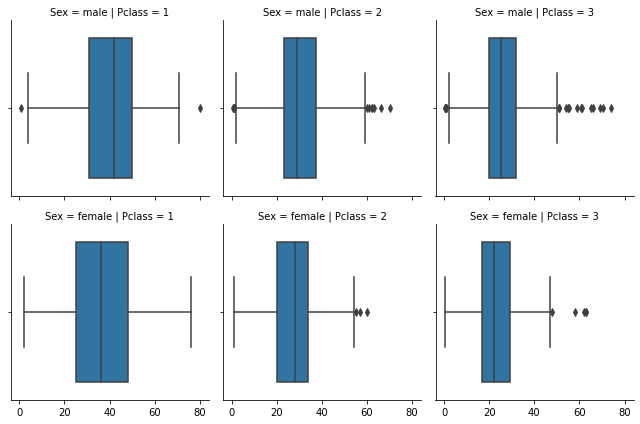

In [338]:
g = sns.FacetGrid(df, col="Pclass",  row="Sex")
g.map_dataframe(sns.boxplot, x="Age")

It can be seen that in different Pclass and for different genders the median of Age values are different. therefore the missing values should be imputed based on these two criterias as well

### imputing missing values for Age Variable

In [339]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [340]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Class             5
dtype: int64

The missing values of 'Age variable has been removed '

### Drop Age_wiki variable 

since Age variable is already there the Age_wiki variable will be removd from the data set

In [341]:
df.drop(columns='Age_wiki', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Hometown     1304 non-null   object 
 15  Boarded      1304 non-null   object 
 16  Destination  1304 non-null   object 
 17  Lifeboat     502 non-null    object 
 18  Class        1304 non-null   float64
dtypes: flo

# Checking name & wiki name variable 


In [342]:
print(df[['Name','Name_wiki']].head())
df[['Name','Name_wiki']].isnull().sum()

                                                Name  \
0                            Braund, Mr. Owen Harris   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2                             Heikkinen, Miss. Laina   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4                           Allen, Mr. William Henry   

                                    Name_wiki  
0                     Braund, Mr. Owen Harris  
1  Cumings, Mrs. Florence Briggs (née Thayer)  
2                       Heikkinen, Miss Laina  
3          Futrelle, Mrs. Lily May (née Peel)  
4                    Allen, Mr. William Henry  


Name         0
Name_wiki    5
dtype: int64

both columns look alike but name wiki has 5 missing values. therefore this column will be removed 

## Removing Name_wiki

In [343]:
df.drop(columns="Name_wiki",axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Hometown',
       'Boarded', 'Destination', 'Lifeboat', 'Class'],
      dtype='object')

Name wiki has been removed. 

# Extracting Titles from names 

In [344]:
df["Title"]=df["Name"].str.extract('([A-Za-z]+)\.',expand=False)
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Hometown',
       'Boarded', 'Destination', 'Lifeboat', 'Class', 'Title'],
      dtype='object')

Title columns has been included. 

# Title info

In [345]:
print(df.Title.unique())
print(df.Title.value_counts())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer' 'Dona']
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Don           1
Mme           1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Countess      1
Name: Title, dtype: int64


The title can be categorized in to five main categories : Mr. ,Mrs. ,Miss., Master., Other

In [346]:
df["Title"]=df['Title'].replace(['Rev','Dr','Col','Major','Mlle','Ms','Countess','Capt','Dona','Mme','Lady','Don','Jonkheer','Sir'],"Other")

In [347]:
df['Title'].unique()
df['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: Title, dtype: int64

The title names have been replaced 

# Title vs. Survived

Title       Master      Miss        Mr       Mrs     Other
Survived                                                  
0.0       0.030965  0.100182  0.794171  0.047359  0.027322
1.0       0.067251  0.371345  0.236842  0.289474  0.035088


<AxesSubplot:xlabel='Survived'>

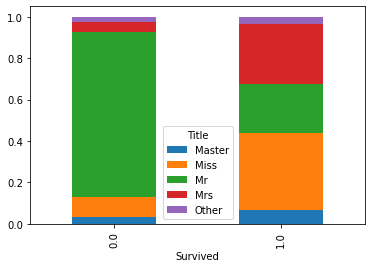

In [348]:
cross_tab_prop = pd.crosstab(index=df['Survived'],
                             columns=df['Title'], normalize="index")
print(cross_tab_prop)
cross_tab_prop.plot(kind='bar',stacked =True )


Mr has a high chance to die while Mrs has a high chance to survive 

# Drop name variable 

since essentail data is extracted from name it can be dropped

In [349]:
df.drop(columns="Name",axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Hometown', 'Boarded',
       'Destination', 'Lifeboat', 'Class', 'Title'],
      dtype='object')

# Drop passenger id and wiki id 


These two variables do not provide any meaningfull information. therefore these can be dropped

In [350]:
df.drop(columns=['PassengerId','WikiId'],axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Hometown', 'Boarded', 'Destination', 'Lifeboat',
       'Class', 'Title'],
      dtype='object')

# Pclass vs . Class

<AxesSubplot:xlabel='Class', ylabel='count'>

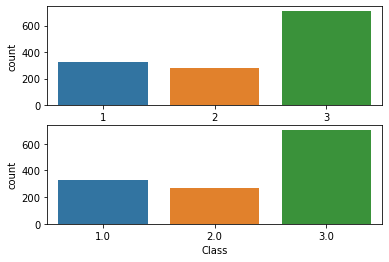

In [351]:
plt.subplot(2,1,1)
sns.countplot(data=df, x='Pclass')

plt.subplot(2,1,2)
sns.countplot(data=df,x='Class')

Both looks same. Therefore one should be removed

In [353]:
df[['Pclass','Class','SibSp','Fare']][df['Pclass']!=df['Class']]

,Pclass,Class,SibSp,Fare
181,2,1.0,0,15.0500
345,2,1.0,0,13.0000
347,3,NaN,1,16.1000
557,1,NaN,0,227.5250
969,2,1.0,0,13.0000
1000,2,1.0,0,13.0000
1041,1,NaN,0,83.1583
1048,3,NaN,0,7.8542
1228,3,NaN,0,7.2292
1296,2,1.0,0,13.8625


Here it can be seen that in Class column some mis interpretation has been done. the firt class fare is very low. but in pclass the fare for second class is reasonable. and also most of the missing values are in Class.  therefore Class will be omitte.


# Drop Class variable

In [354]:
df.drop(columns='Class', axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Hometown', 'Boarded', 'Destination', 'Lifeboat',
       'Title'],
      dtype='object')



# Fare variable 


In [355]:
df['Fare'].isnull().sum()

1

Only one missing value 

In [356]:
df[df['Fare'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Hometown,Boarded,Destination,Lifeboat,Title
1043,NaN,3,male,60.5,0,0,3701,NaN,NaN,S,"Liverpool, Merseyside, England,",Southampton,New York City,NaN,Mr


# Fare vs. Class

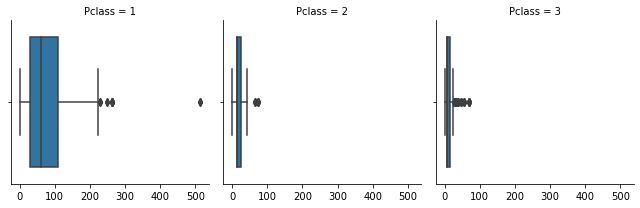

In [357]:
g=sns.FacetGrid(df,col='Pclass')
g.map_dataframe(sns.boxplot, x="Fare")

It can be seen that the Fare of First class is higher when comapred with 2nd and 3rd class

# Fare vs. Sex

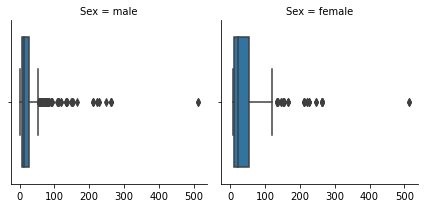

In [358]:
g=sns.FacetGrid(df,col='Sex')
g.map_dataframe(sns.boxplot, x="Fare")

There is a significant difference in fare between between males and females

# Fare vs. title


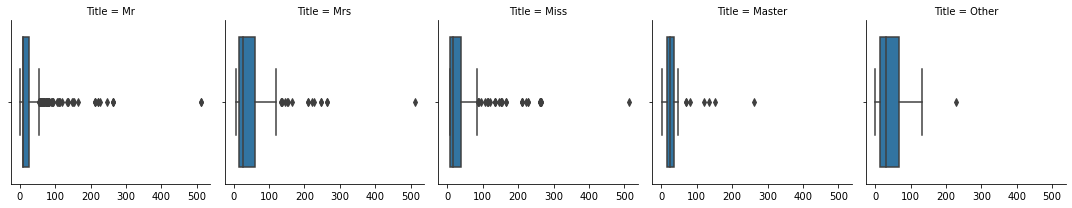

In [359]:
g=sns.FacetGrid(df,col='Title')
g.map_dataframe(sns.boxplot, x="Fare")

There is a significant difference in fare among different title categories

# Fare vs Embarked

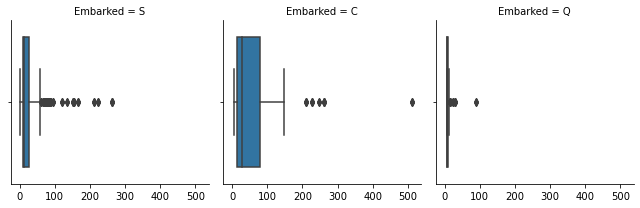

In [360]:
g=sns.FacetGrid(df,col='Embarked')
g.map_dataframe(sns.boxplot, x="Fare")

The fare changes with embarked category as well 

Since fare changes with title,Sex, Class and embarked  when imputing a value to fare  these should be taken in to account 

In [361]:
# median of Fare based on the following criteria
med=df[(df['Title']=='Mr') & (df['Sex']=='male') & (df['Pclass']==3) & (df['Embarked']=='S')]['Fare'].median()

# imputing the missing value with median 
df['Fare'].fillna(med,inplace=True)
df.Fare.isnull().sum()


0

# Fare vs. Survival

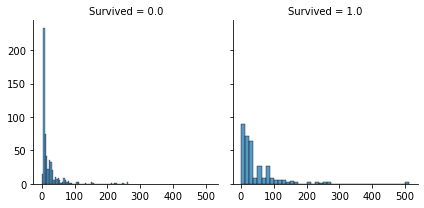

In [362]:
g=sns.FacetGrid(df,col='Survived')
g.map_dataframe(sns.histplot, x="Fare")

The large number of people with low fare has not survived and a larger number of people with high fare has survived when compared with those who have not survived

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

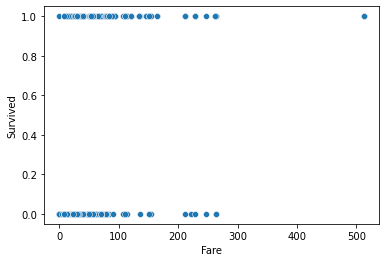

In [363]:
sns.scatterplot(x='Fare',y='Survived',data=df)

When the scatter plot is checked a clear pattern cannot be seen between survival and fare

# Mean fare price by passenger class 

<AxesSubplot:xlabel='Pclass'>

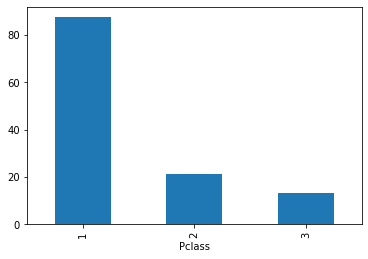

In [364]:
# Plot showing the mean fare price of each passenger class
df.groupby('Pclass').Fare.mean().plot(kind='bar')


It is obvious that the mean fare is higher for first class and secondly for seconf class and finally for 3rd class.Since the fare price represent the same information of passengers economic status it will be removed from the study 

# Drop Fare

In [365]:
df.drop(columns='Fare',axis=1,inplace=True)

In [366]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin',
       'Embarked', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Title'],
      dtype='object')

# Cabin Variable

In [367]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Here it can be seen that the first letter of the cabin contains and alphabetical letter from A,B,C,D,E,F,G. The rest can be . some room numbers. by domain knowledge it can be infered that the first letter represents the floor letter. where A is the first floor and g the the bottom floor . 

In [368]:
df['Cabin'].isnull().sum()

1014

In [369]:
print(df.shape)
print('Total missing percentage of Cabin : ', (1014/1309)*100)

(1309, 14)
Total missing percentage of Cabin :  77.46371275783041


Around 77% of the data in cabin variable is missing

# Extracting first letter from Cabin variable 

In [370]:
df['floor']=df['Cabin'].apply(lambda x:x[0] if x is not np.nan else np.nan )

print(df['floor'].unique())
print(df['floor'].value_counts())


[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: floor, dtype: int64


The missing values should be imputed. and also there is a missspelt category T which needs to be corrected 

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


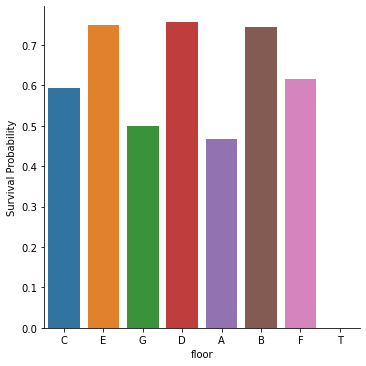

In [371]:
sns.factorplot(x='floor', y='Survived', data=df, kind="bar", ci=None)
plt.xlabel('floor')
plt.ylabel('Survival Probability')
plt.show()

The Survival rate of the floor doesnot show a clear pattern eventhough A is in the top most floor and B is in the second the survival rate of B, E higher than A . therefore meaningfull information cannot be taken based on floor value . This should be further confirmed by plotting survival against sex 

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


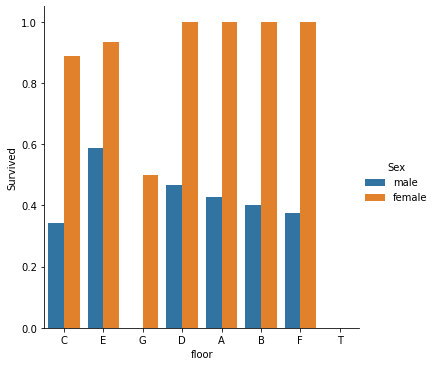

In [372]:
sns.factorplot(data=df, x='floor', y='Survived', hue='Sex', kind="bar", ci=None)

Here it can be seen that no matter what the floor is the survival prob is higher for females than males

Therefore floor and Cabin variables can be removed from the dataset 

# Drop floor and cabin

In [373]:
df.drop(columns=['floor','Cabin'], axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Title'],
      dtype='object')

# Embarked vs. boarded

In [374]:
df[['Embarked','Boarded']]

,Embarked,Boarded
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton
...,...,...
1304,S,Southampton
1305,C,Cherbourg
1306,S,Southampton
1307,S,Southampton


It can be seen that both Embarked and boarded are same. The first letter of Boarded is given for Embarked. Therefore one column can be removed 

Embarked has 2 missing values while boarded has 5 missing values. Therefore boarded will be dropped


# Drop Boarded

In [375]:
df.drop(columns='Boarded',axis=1,inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Embarked', 'Hometown', 'Destination', 'Lifeboat', 'Title'],
      dtype='object')

# Ticket variable

In [376]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

The ticket variable does not provide much meaningfull information. therefore it can be dropped

# Drop Ticket

In [377]:
df.drop(columns='Ticket',axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Hometown', 'Destination', 'Lifeboat', 'Title'],
      dtype='object')

# Hometown & Desitination

In [378]:
df['Hometown'].unique()

array(['Bridgerule, Devon, England', 'New York, New York, US',
       'Jyväskylä, Finland', 'Scituate, Massachusetts, US',
       'Birmingham, West Midlands, England', 'Cork, Ireland',
       'Dorchester, Massachusetts, US', 'Bjuv, Skåne, Sweden',
       'St. Charles, Illinois, US', 'Zahlé, Lebanon, Ottoman Empire',
       'Motala, Östergötland, Sweden', 'Youngstown, Ohio, US',
       'St Austell, Cornwall, England', 'Kisa, Östergötland, Sweden',
       'Salmunds, Gotland, Sweden', 'Lucknow, British India, UK[note 3]',
       'Athlone, Westmeath, Ireland', 'Harrow, London, England',
       'Pittem, Belgium', 'Tebnine, Lebanon',
       'Liverpool, Merseyside, England, UK', 'London, England, UK',
       'Massbrook, Mayo, Ireland', 'New Britain, Connecticut, US',
       'Alseda, Småland, Sweden', 'Hadath, Lebanon',
       'Winnipeg, Manitoba, Canada', 'Limerick, Limerick, Ireland',
       'Unknown, Bulgaria', 'Mexico City, Mexico',
       'Killaloe, Clare, Ireland', 'Guernsey, Channel Isl

In [379]:
df['Destination'].unique()

array(["Qu'Appelle Valley, Saskatchewan, Canada",
       'New York, New York, US', 'New York City',
       'Scituate, Massachusetts, US', 'Dorchester, Massachusetts, US',
       'Chicago, Illinois, US', 'St. Charles, Illinois, US',
       'Cleveland, Ohio, US', 'San Francisco, US', 'Youngstown, Ohio, US',
       'Winnipeg, Manitoba, Canada', 'Los Angeles, US',
       'Rapid City, South Dakota, US', 'Spokane, Washington, US',
       'Fremont, Ohio, US', 'Michigan City, Indiana, US',
       'Montreal, Quebec, Canada', 'Toronto, Ontario, Canada',
       'New Britain, Connecticut, US', 'Worcester, Massachusetts, US',
       'Mexico City, Mexico', 'Washington, DC, US',
       'Edgewood, Rhode Island, US', 'Philadelphia, Pennsylvania, US',
       'Jacksonville, Florida, US', 'Akeley, Minnesota, US',
       'Salt Lake City, Utah, US', 'Madison, Wisconsin, US',
       'Cap-Haïtien, Haiti', 'Jersey City, New Jersey, US',
       'Wilkes-Barre, Pennsylvania, US', 'New Glarus, Wisconsin, US',
    

Hometown and Destination doesnot provide much information therefore they can be removed

# Drop hometown and Destination 

In [380]:
df.drop(columns=['Hometown','Destination'],axis=1, inplace=True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Lifeboat', 'Title'],
      dtype='object')

# Sibsp

In [381]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


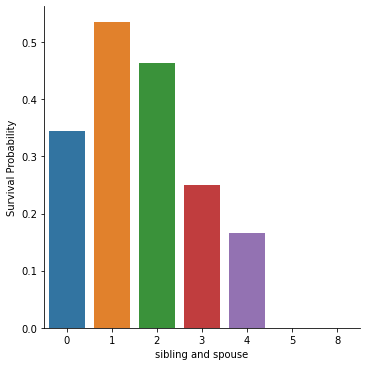

In [382]:
sns.factorplot(x='SibSp', y='Survived', data=df, kind="bar", ci=None)
plt.xlabel('sibling and spouse')
plt.ylabel('Survival Probability')
plt.show()

The probability of survival for 1 or 2 sibling or spouse has a higher chance of survival

In [383]:
df['SibSp'].isnull().sum()

0

There are no missing values

# Parch

In [384]:
df['Parch'].isnull().sum()

0

No missing values in this variable

In [385]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


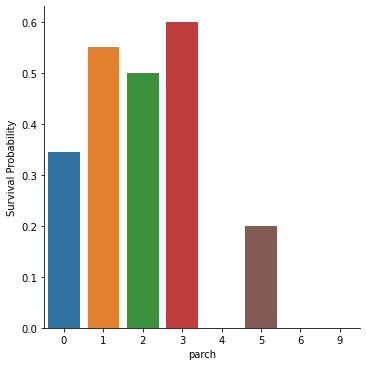

In [386]:
sns.factorplot(x='Parch', y='Survived', data=df, kind="bar", ci=None)
plt.xlabel('parch')
plt.ylabel('Survival Probability')
plt.show()

The probability of survival for the people who travelled with 1,2,3 is parents or childeren is higher

In [387]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Lifeboat', 'Title'],
      dtype='object')

# Age vs. Survival

<AxesSubplot:xlabel='Age', ylabel='Survived'>

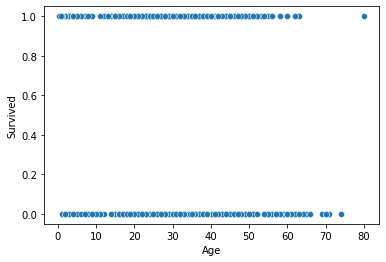

In [388]:
sns.scatterplot(data=df, x='Age', y='Survived')

Eventhough a clear pattern cannot be seen it is obvious that  the survival rate of those who are older than 60 year is very low except for some outlier value

   # Lifeboat

In [389]:
print(df['Lifeboat'].isnull().sum())

print("null missing percentge: ",(807/1309)*100)

807
null missing percentge:  61.65011459129106


61% of the values are missing

In [390]:
df['Lifeboat'].value_counts()


13       42
C        41
15       38
14       34
4        31
5        29
10       29
9        26
11       26
3        26
8        24
16       23
7        22
6        21
12       18
D        18
2        14
?        12
A        11
B         9
1         5
14?       1
15?       1
A[64]     1
Name: Lifeboat, dtype: int64

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


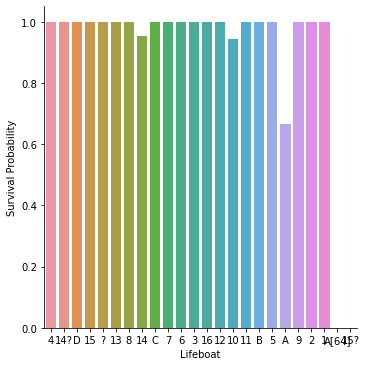

In [391]:
sns.factorplot(x='Lifeboat', y='Survived', data=df, kind="bar", ci=None)
plt.xlabel('Lifeboat')
plt.ylabel('Survival Probability')
plt.show()

The survival rate of all lifeboats are 100% except for A, 14 and 10. As the information contains many missing values and a majority of lifeboats was able to save lifes this information is not necessary for predicting the survival. Hence this column will be dropped

# Drop Lifeboat

In [392]:
df.drop(columns='Lifeboat',axis=1,inplace=True)

In [393]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked',
       'Title'],
      dtype='object')

# bining Age variable

<AxesSubplot:xlabel='Age'>

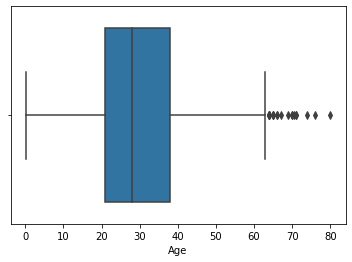

In [394]:

sns.boxplot(data=df, x='Age')

The age has outliers therefore it will be put in to 5 categories

In [395]:
df['Age']=pd.cut(df['Age'].astype(int),5)


In [396]:
df['Age'].unique()
df['Age'].value_counts()

(16.0, 32.0]     696
(32.0, 48.0]     323
(-0.08, 16.0]    158
(48.0, 64.0]     117
(64.0, 80.0]      15
Name: Age, dtype: int64

# Age vs Survived

C:\Users\Azfa Razzaq\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


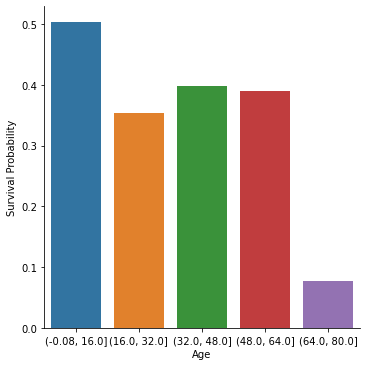

In [397]:
sns.factorplot(x='Age', y='Survived', data=df, kind="bar", ci=None)
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.show()

The survival rate of last age cateogry is very low

# Encoding Categorical variables

In [398]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex','Embarked','Title'])

In [399]:
one_hot_encoded_data

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.0,3,"(16.0, 32.0]",1,0,0,1,0,0,1,0,0,1,0,0
1,1.0,1,"(32.0, 48.0]",1,0,1,0,1,0,0,0,0,0,1,0
2,1.0,3,"(16.0, 32.0]",0,0,1,0,0,0,1,0,1,0,0,0
3,1.0,1,"(32.0, 48.0]",1,0,1,0,0,0,1,0,0,0,1,0
4,0.0,3,"(32.0, 48.0]",0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"(16.0, 32.0]",0,0,0,1,0,0,1,0,0,1,0,0
1305,NaN,1,"(32.0, 48.0]",0,0,1,0,1,0,0,0,0,0,0,1
1306,NaN,3,"(32.0, 48.0]",0,0,0,1,0,0,1,0,0,1,0,0
1307,NaN,3,"(32.0, 48.0]",0,0,0,1,0,0,1,0,0,1,0,0


# Checking Survived (Response) variable

In [400]:
print("unique values: " ,df['Survived'].unique())
print("missing values : ", df['Survived'].isnull().sum())
print ("total percentage of missing data: " , (418/1309)*100)
df.Survived.value_counts()

unique values:  [ 0.  1. nan]
missing values :  418
total percentage of missing data:  31.932773109243694


0.0    549
1.0    342
Name: Survived, dtype: int64


418 cases are missing in the survived variable. these rows should be taken  as seperate table to predict the survival as predicted table. the rest will be used as the training data set where the train set will be further divived as train and test for model fitting and validation.

In [401]:
df_to_predict=df[one_hot_encoded_data['Survived'].isnull()]

In [402]:
df_to_predict.shape

(418, 8)

In [403]:
indexes = one_hot_encoded_data[one_hot_encoded_data['Survived'].isnull()].index
df_to_train=one_hot_encoded_data.drop(indexes)

In [404]:
df_to_train

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0.0,3,"(16.0, 32.0]",1,0,0,1,0,0,1,0,0,1,0,0
1,1.0,1,"(32.0, 48.0]",1,0,1,0,1,0,0,0,0,0,1,0
2,1.0,3,"(16.0, 32.0]",0,0,1,0,0,0,1,0,1,0,0,0
3,1.0,1,"(32.0, 48.0]",1,0,1,0,0,0,1,0,0,0,1,0
4,0.0,3,"(32.0, 48.0]",0,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,"(16.0, 32.0]",0,0,0,1,0,0,1,0,0,0,0,1
887,1.0,1,"(16.0, 32.0]",0,0,1,0,0,0,1,0,1,0,0,0
888,0.0,3,"(-0.08, 16.0]",1,2,1,0,0,0,1,0,1,0,0,0
889,1.0,1,"(16.0, 32.0]",0,0,0,1,1,0,0,0,0,1,0,0


Note : df to train should be further divided in to training and testing test before building a ML model